# Statistical Significance

In [4]:
import sklearn
import numpy as np
import matplotlib
import pandas as pd
import sklearn
from platform import python_version

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import pandas as pd

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("pandas version:     ", pd.__version__)
print("sklearn version:    ", sklearn.__version__)


Python version:      3.10.9
sklearn version:     1.2.1
numpy version:       1.23.5
matplotlib version:  3.7.0
pandas version:      1.5.3
sklearn version:     1.2.1


## 6.2 Null Hypothesis Statistical Testing
### 6.2.2 Comparing Two Classifiers on Multiple Domains
#### Table 6.1 Wilcoxon's Signed-Ranks Test

In [2]:
# Load BreastCancer Dataset
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X_0 = bc_data.iloc[:,2:33].to_numpy()

y_0= bc_data.iloc[:,1].to_numpy()

# Load Liver Dataset
liv_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
liv_data = pd.read_csv(liv_link, header = None)
X_1 = liv_data.iloc[:,0:5].to_numpy()
y_1= liv_data.iloc[:,6].to_numpy()

# Load Balance Scale Dataset
balance_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
balance_data = pd.read_csv(balance_link, header=None)
# X_2 = balance_data.iloc[:,1:4].to_numpy()
# y_2= balance_data.iloc[:,0].to_numpy()

# Load Contact Lenses Dataset
contacts_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
contacts_data = pd.read_csv(contacts_link, header=None, delimiter=r"\s+")
X_3 = contacts_data.iloc[:,2:5].astype("category").to_numpy()
y_3= contacts_data.iloc[:,1].astype("category").to_numpy()

# Load Pima Diabetes Dataset
#diabetes_link = 
# The dataset is no longer available on UCI, permission restrictions were cited

# Glass Dataset
glass_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glass_data = pd.read_csv(glass_link, header=None)
X_4 = glass_data.iloc[:,1:10].to_numpy()
y_4= glass_data.iloc[:,10].to_numpy()

# Hepatitis Dataset
hepatitis_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hepatitis_data = pd.read_csv(hepatitis_link, header=None)
# X_5 = hepatitis_data.iloc[:,1:].to_numpy()
# y_5 = hepatitis_data.iloc[:,0].to_numpy()

#https://raw.githubusercontent.com/Sunday-Okey/Pandas_Lesson_Colab/main/data/cleaned_hepatitis_data.csv
# Hypothyroid Dataset
hypothyroid_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"
hypothyroid_data = pd.read_csv(hypothyroid_link, header=None)

# Load Anneal Dataset
anneal_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"
anneal_data = pd.read_csv(anneal_link, header = None)
#X_2 = liv_data.iloc[:,0:5].to_numpy()
#y_2= liv_data.iloc[:,6].to_numpy()

# Tic-Tag-Toe Dataset
tic_tac_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
tic_tac_data = pd.read_csv(tic_tac_link, header = None)


#### Anneal data

In [19]:
anneal = pd.read_csv("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_II/data/clean_anneal.csv?token=GHSAT0AAAAAAB6ALPEJVCEDZVXVQK7OL6K6ZCGWCXQ")

In [20]:
X_9 = anneal.iloc[:,:-1]
y_9 = anneal.iloc[:,-1]

#### Balance Data

In [5]:
balance_data = pd.read_csv("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_II/data/clean_balance_data.csv?token=GHSAT0AAAAAAB6ALPEIPSBHZEZ7E36MXCMIZCGVHJQ")

In [6]:
balance_data

,0,1,2,3,4
0,0,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5
...,...,...,...,...,...
620,2,5,5,5,1
621,2,5,5,5,2
622,2,5,5,5,3
623,2,5,5,5,4


In [18]:
X_2 = balance_data.iloc[:,1:]
y_2 = balance_data.iloc[:,0]

#### Hepatitis Data

In [8]:
hepatitis_data = pd.read_csv("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_II/data/clean_hepatitis_data.csv?token=GHSAT0AAAAAAB6ALPEJ3DUR44SVUC7LVCSEZCGVXHA")

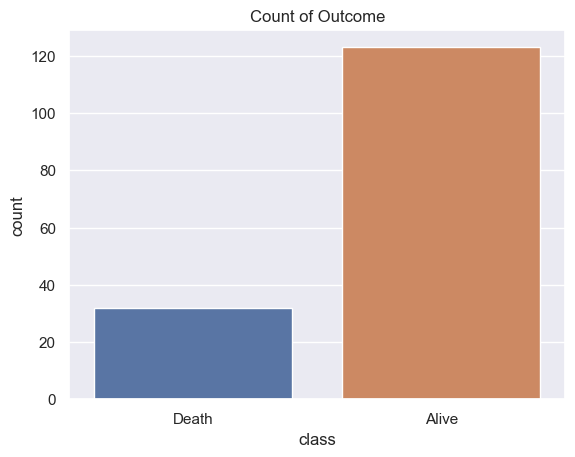

In [9]:
class_count=sns.countplot(x="class", data=hepatitis_data)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_validate
sc=StandardScaler()
sc.fit(hepatitis_data.drop(["class"], axis = 1))
scaled_features = sc.transform(hepatitis_data.drop(["class"], axis = 1))
X_5 =scaled_features
y_5 = hepatitis_data["class"] 

#### Hypothyroid Data

In [51]:
imputed_df.sex.value_counts()

2.0    2255
1.0     908
Name: sex, dtype: int64

In [10]:
hypothyroid = pd.read_csv("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_II/data/clean_hypothyroid_data.csv?token=GHSAT0AAAAAAB6ALPEJKTMLPPOTBWG4IVLOZCGV2FQ")

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_validate
sc=StandardScaler()
sc.fit(hypothyroid.drop(["binary_class"], axis = 1))
scaled_features = sc.transform(hypothyroid.drop(["binary_class"], axis = 1))
X_6 = scaled_features
y_6 = hypothyroid["binary_class"] 




#### Tic Tac Toe Data

In [13]:
tic_tac_toe = pd.read_csv("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_II/data/clean_tic_tac_toe.csv?token=GHSAT0AAAAAAB6ALPEIRCKZPXVRJBMEA7GEZCGV6YQ")

In [14]:
X_7 = tic_tac_toe.iloc[:,:-1].astype('int')
y_7 = tic_tac_toe.iloc[:,-1].astype('int')

In [15]:
y_7

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: 9, Length: 958, dtype: int32

#### Diabetes Data

In [3]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/Sunday-Okey/Pandas_Lesson_Colab/main/data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X_8 = diabetes.iloc[:,:-1]
y_8 = diabetes.iloc[:, -1]

In [65]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Split data:

In [66]:
y_8.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

# Breast Cancer
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.20, random_state=42)

# Liver
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

# Balance Scale
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=42)

# Contact Lenses
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=42)

# Glass
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20, random_state=42)

# Hepatitis
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20, random_state=42)

#hypothyroid_data
# Split data into training and testing sets
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6,y_6,test_size=0.2,random_state=42)

# Tic_Tac_Toe
# Split data into training and testing sets
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.20, random_state=42)

#diabetes_data
# Split data into training and testing sets
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.20, random_state=42)

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.20, random_state=42)

Train classifiers:

In [68]:
# Breast_Cancer
np.random.seed(42)
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
nb_preds = NBclf.predict(X_test)

# SVM
from sklearn.svm import SVC
SVMclf = SVC()
SVMclf.fit(X_train, y_train)
svm_preds = SVMclf.predict(X_test)

# Liver

np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_1, y_train_1)
nb_preds_1 = NBclf.predict(X_test_1)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_1, y_train_1)
svm_preds_1 = SVMclf.predict(X_test_1)


In [69]:
# Balance Scale
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_2, y_train_2)
nb_preds_2 = NBclf.predict(X_test_2)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_2, y_train_2)
svm_preds_2 = SVMclf.predict(X_test_2)


# Contact Lenses
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_3, y_train_3)
nb_preds_3 = NBclf.predict(X_test_3)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_3, y_train_3)
svm_preds_3 = SVMclf.predict(X_test_3)

# Glass
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_4, y_train_4)
nb_preds_4 = NBclf.predict(X_test_4)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_4, y_train_4)
svm_preds_4 = SVMclf.predict(X_test_4)

# Hepatitis
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_5, y_train_5)
nb_preds_5 = NBclf.predict(X_test_5)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_5, y_train_5)
svm_preds_5 = SVMclf.predict(X_test_5)

#hypothyroid_data
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_6, y_train_6)
nb_preds_6 = NBclf.predict(X_test_6)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_6, y_train_6)
svm_preds_6 = SVMclf.predict(X_test_6)

# Tic_Tac_Toe
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_7, y_train_7)
nb_preds_7 = NBclf.predict(X_test_7)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_7, y_train_7)
svm_preds_7 = SVMclf.predict(X_test_7)

# Diabetes
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_8, y_train_8)
nb_preds_8 = NBclf.predict(X_test_8)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_8, y_train_8)
svm_preds_8 = SVMclf.predict(X_test_8)

In [70]:
# Diabetes
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_8, y_train_8)
nb_preds_8 = NBclf.predict(X_test_8)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_8, y_train_8)
svm_preds_8 = SVMclf.predict(X_test_8)

# Anneal 
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_9, y_train_9)
nb_preds_9 = NBclf.predict(X_test_9)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_9, y_train_9)
svm_preds_9 = SVMclf.predict(X_test_9)

In [71]:
from sklearn.metrics import accuracy_score
results = pd.DataFrame({
    "NB Accuracy" : [accuracy_score(y_test, nb_preds), accuracy_score(y_test_1, nb_preds_1),
                    accuracy_score(y_test_2, nb_preds_2), accuracy_score(y_test_3, nb_preds_3),
                    accuracy_score(y_test_4, nb_preds_4), accuracy_score(y_test_5, nb_preds_5),
                    accuracy_score(y_test_6, nb_preds_6),accuracy_score(y_test_7, nb_preds_7),
                    accuracy_score(y_test_8, nb_preds_8), accuracy_score(y_test_9, nb_preds_9)],
    "SVM Accuracy" : [accuracy_score(y_test, svm_preds), accuracy_score(y_test_1, svm_preds_1),
                     accuracy_score(y_test_2, svm_preds_2),accuracy_score(y_test_3, svm_preds_3),
                     accuracy_score(y_test_4, svm_preds_4), accuracy_score(y_test_5, svm_preds_5),
                     accuracy_score(y_test_6, svm_preds_6), accuracy_score(y_test_7, svm_preds_7),
                     accuracy_score(y_test_8, svm_preds_8), accuracy_score(y_test_9, svm_preds_9)],
    }
)

results["NB-SVM"] = results["NB Accuracy"] - results["SVM Accuracy"]
results["|NB-SVM|"] = abs(results["NB-SVM"])
order = results["|NB-SVM|"].argsort()
results["Ranks(|NB-SVM|)"] = order.argsort() + 1
results["+/- Ranks(|NB-SVM|)"] = results["Ranks(|NB-SVM|)"] * (results["NB-SVM"] / results["|NB-SVM|"])

results.fillna('remove', inplace = True)
results.index = np.arange(1, len(results) + 1)
results['Domain No.'] = results.index 

results.set_index('Domain No.', inplace = True)
results

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
Domain No.,,,,,,
1,0.973684,0.947368,0.026316,0.026316,4,4.0
2,0.492754,0.710145,-0.217391,0.217391,7,-7.0
3,0.888000,0.904000,-0.016000,0.016000,3,-3.0
4,0.200000,0.200000,0.000000,0.000000,1,remove
5,0.558140,0.325581,0.232558,0.232558,8,8.0
6,0.645161,0.709677,-0.064516,0.064516,5,-5.0
7,0.214850,0.974724,-0.759874,0.759874,10,-10.0
8,0.708333,0.880208,-0.171875,0.171875,6,-6.0
9,0.766234,0.766234,0.000000,0.000000,2,remove


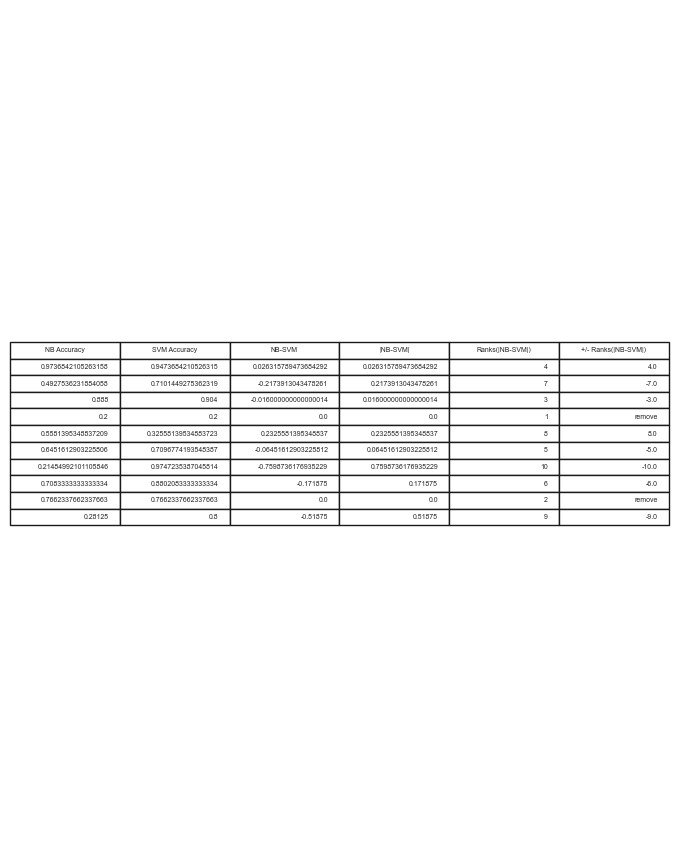

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


df = results

# create a pdf file
with PdfPages('./Figures/wilcoxon_table1.pdf') as pdf:
    # create a table from the dataframe
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    # add the table to the pdf file
    pdf.savefig(fig, bbox_inches='tight')


In [73]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results["NB Accuracy"], results['SVM Accuracy'] )
wilcoxon_test.statistic, wilcoxon_test.pvalue

C:\Users\Sunday Okechukwu\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Sunday Okechukwu\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(8.0, 0.16142946236708333)

In [74]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results["NB-SVM"])
wilcoxon_test.statistic, wilcoxon_test.pvalue

(8.0, 0.16142946236708333)

In [75]:
results_wilcoxon = results.drop([4, 9])


In [76]:
results_wilcoxon 

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
Domain No.,,,,,,
1,0.973684,0.947368,0.026316,0.026316,4,4.0
2,0.492754,0.710145,-0.217391,0.217391,7,-7.0
3,0.888000,0.904000,-0.016000,0.016000,3,-3.0
5,0.558140,0.325581,0.232558,0.232558,8,8.0
6,0.645161,0.709677,-0.064516,0.064516,5,-5.0
7,0.214850,0.974724,-0.759874,0.759874,10,-10.0
8,0.708333,0.880208,-0.171875,0.171875,6,-6.0
10,0.281250,0.800000,-0.518750,0.518750,9,-9.0


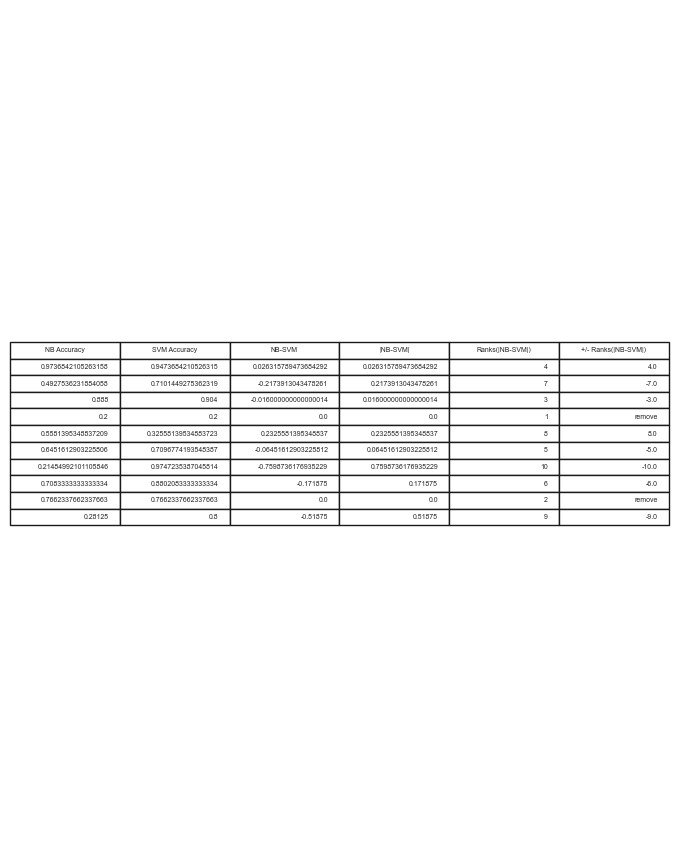

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


df = results

# create a pdf file
with PdfPages('./Figures/wilcoxon_table2.pdf') as pdf:
    # create a table from the dataframe
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    # add the table to the pdf file
    pdf.savefig(fig, bbox_inches='tight')

In [78]:
results_wilcoxon["NB-SVM"] = results_wilcoxon["NB Accuracy"] - results_wilcoxon["SVM Accuracy"]
results_wilcoxon["|NB-SVM|"] = abs(results_wilcoxon["NB-SVM"])
order = results_wilcoxon["|NB-SVM|"].argsort()
results_wilcoxon["Ranks(|NB-SVM|)"] = order.argsort() + 1
results_wilcoxon["+/- Ranks(|NB-SVM|)"] = results_wilcoxon["Ranks(|NB-SVM|)"] * (results_wilcoxon["NB-SVM"] / results_wilcoxon["|NB-SVM|"])

results_wilcoxon.index = np.arange(1, len(results_wilcoxon) + 1)
results_wilcoxon['Domain No.'] = results_wilcoxon.index 

results_wilcoxon.set_index('Domain No.', inplace = True)
results_wilcoxon

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
Domain No.,,,,,,
1,0.973684,0.947368,0.026316,0.026316,2,2.0
2,0.492754,0.710145,-0.217391,0.217391,5,-5.0
3,0.888000,0.904000,-0.016000,0.016000,1,-1.0
4,0.558140,0.325581,0.232558,0.232558,6,6.0
5,0.645161,0.709677,-0.064516,0.064516,3,-3.0
6,0.214850,0.974724,-0.759874,0.759874,8,-8.0
7,0.708333,0.880208,-0.171875,0.171875,4,-4.0
8,0.281250,0.800000,-0.518750,0.518750,7,-7.0


In [79]:
results_wilcoxon

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
Domain No.,,,,,,
1,0.973684,0.947368,0.026316,0.026316,2,2.0
2,0.492754,0.710145,-0.217391,0.217391,5,-5.0
3,0.888000,0.904000,-0.016000,0.016000,1,-1.0
4,0.558140,0.325581,0.232558,0.232558,6,6.0
5,0.645161,0.709677,-0.064516,0.064516,3,-3.0
6,0.214850,0.974724,-0.759874,0.759874,8,-8.0
7,0.708333,0.880208,-0.171875,0.171875,4,-4.0
8,0.281250,0.800000,-0.518750,0.518750,7,-7.0


In [80]:
wilcoxon = results_wilcoxon['NB-SVM']

In [81]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results_wilcoxon["NB Accuracy"], results_wilcoxon['SVM Accuracy'] )
wilcoxon_test.statistic, wilcoxon_test.pvalue

(8.0, 0.1953125)

In [82]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results_wilcoxon["NB-SVM"])
wilcoxon_test.statistic, wilcoxon_test.pvalue

(8.0, 0.1953125)

In [83]:
from scipy.stats import wilcoxon

nb_acc = results_wilcoxon["NB Accuracy"].values
svm_acc = results_wilcoxon["SVM Accuracy"].values
differences = nb_acc - svm_acc
signs = np.sign(differences)
abs_diffs = abs(differences)
ranks = np.argsort(abs_diffs) + 1
signed_ranks = ranks * signs
T, p = wilcoxon(nb_acc, svm_acc, zero_method="pratt")


In [84]:
from scipy.stats import wilcoxon

# extract differences and remove ties
differences = results_wilcoxon.loc[results_wilcoxon["NB-SVM"] != 0, "NB-SVM"]
differences = differences[differences != 0]

# perform Wilcoxon signed-ranks test
statistic, pvalue = wilcoxon(differences)

print("Wilcoxon signed-ranks test")
print("--------------------------")
print(f"Number of non-zero differences: {len(differences)}")
print(f"Sum of ranks of positive differences: {results_wilcoxon.loc[results_wilcoxon['NB-SVM'] > 0, 'Ranks(|NB-SVM|)'].sum()}")
print(f"Sum of ranks of negative differences: {results_wilcoxon.loc[results_wilcoxon['NB-SVM'] < 0, 'Ranks(|NB-SVM|)'].sum()}")
print(f"Wilcoxon signed-ranks statistic: {statistic}")
print(f"p-value: {pvalue}")


Wilcoxon signed-ranks test
--------------------------
Number of non-zero differences: 8
Sum of ranks of positive differences: 8
Sum of ranks of negative differences: 28
Wilcoxon signed-ranks statistic: 8.0
p-value: 0.1953125


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")

# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},

}

# Define the models
models = [
   
    ('Decision Trees', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# Evaluate each model on each dataset and store the results in a dataframe
results = pd.DataFrame(columns=['Dataset', 'Model', 'Accuracy'])
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for mname, model in models:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results = pd.concat([results, pd.DataFrame({'Dataset': [dname], 'Model': [mname], 'Accuracy': [acc]})])

# Display the results as a dataframe
results


,Dataset,Model,Accuracy
0,Breast Cancer,Decision Trees,0.929825
0,Breast Cancer,Logistic Regression,0.956140
0,Breast Cancer,Random Forest,0.964912
0,Breast Cancer,SVM,0.947368
0,Liver,Decision Trees,0.623188
0,Liver,Logistic Regression,0.724638
0,Liver,Random Forest,0.753623
0,Liver,SVM,0.710145
0,Balance Scale,Decision Trees,0.760000
0,Balance Scale,Logistic Regression,0.840000


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Your code here


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},

}


# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Define the results DataFrame
results = pd.DataFrame(columns=['Domains', 'Decision Trees', 'Logistic Regression', 'Random Forest', 'SVM'])

# Evaluate each model on each dataset and store the results in the results DataFrame
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accs = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accs.append(acc)
    results = results.append(pd.Series([dname] + accs, index=results.columns), ignore_index=True)

# Display the results DataFrame
results
results.index = results.index + 1
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
1,Breast Cancer,0.929825,0.956140,0.956140,0.947368
2,Liver,0.608696,0.724638,0.782609,0.710145
3,Balance Scale,0.760000,0.840000,0.808000,0.904000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000
5,Glass,0.697674,0.720930,0.837209,0.325581
6,Hepatitis,0.612903,0.838710,0.709677,0.709677
7,Hypothyroid,0.985782,0.976303,0.987362,0.974724
8,Tic tac toe,0.875000,0.692708,0.942708,0.880208
9,Diabetes,0.753247,0.746753,0.733766,0.766234
10,Anneal,0.943750,0.787500,0.950000,0.800000


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},
}

# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluate each model on each dataset and store the results in a list of DataFrames
dfs = []
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accs = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accs.append(acc)
    df = pd.DataFrame({'Domains': [dname], 'Decision Trees': [accs[0]],
                       'Logistic Regression': [accs[1]], 'Random Forest': [accs[2]],
                       'SVM': [accs[3]]})
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame and reset the index
results = pd.concat(dfs).reset_index(drop=True)
results.index = results.index + 1

In [90]:
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
1,Breast Cancer,0.938596,0.956140,0.964912,0.947368
2,Liver,0.608696,0.724638,0.768116,0.710145
3,Balance Scale,0.760000,0.840000,0.816000,0.904000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000
5,Glass,0.767442,0.720930,0.883721,0.325581
6,Hepatitis,0.580645,0.838710,0.709677,0.709677
7,Hypothyroid,0.987362,0.976303,0.985782,0.974724
8,Tic tac toe,0.869792,0.692708,0.932292,0.880208
9,Diabetes,0.759740,0.746753,0.753247,0.766234
10,Anneal,0.943750,0.787500,0.943750,0.800000


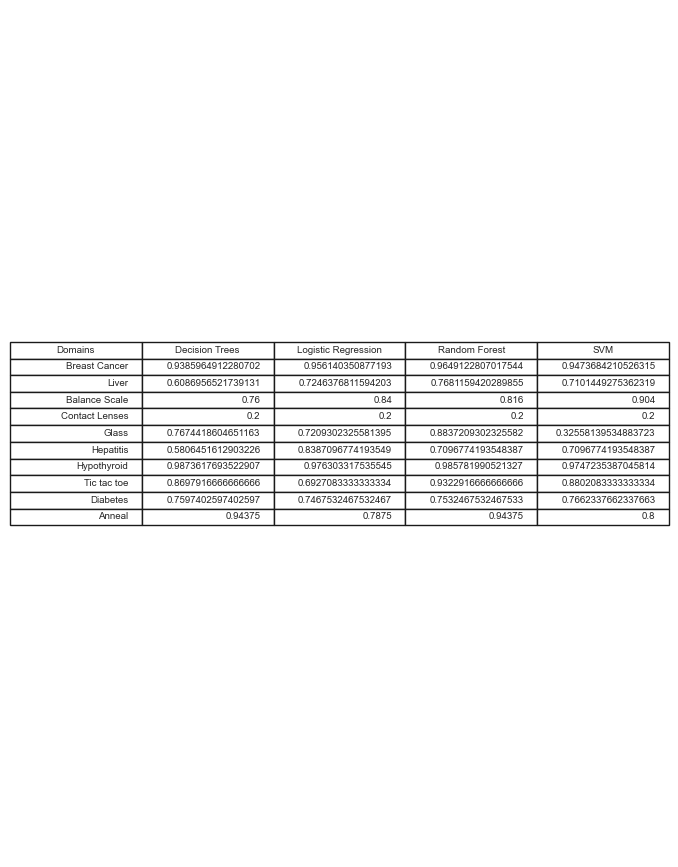

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


df = results

# create a pdf file
with PdfPages('output.pdf') as pdf:
    # create a table from the dataframe
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    # add the table to the pdf file
    pdf.savefig(fig, bbox_inches='tight')


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},
}

# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluate each model on each dataset and store the results in a list of DataFrames
dfs = []
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scores = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        scores.append((mname, acc))
    scores.sort(key=lambda x: x[1], reverse=True)
    ranks = [i+1 for i in range(len(scores))]
    df = pd.DataFrame({'Domains': [dname], 
                       scores[0][0]: [ranks[0]],
                       scores[1][0]: [ranks[1]],
                       scores[2][0]: [ranks[2]],
                       scores[3][0]: [ranks[3]]})
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame and reset the index
ranks = pd.concat(dfs).reset_index(drop=True)

ranks.index = ranks.index + 1

In [93]:
ranks

,Domains,Logistic Regression,Random Forest,SVM,Decision Trees
1,Breast Cancer,1,2,3,4
2,Liver,2,1,3,4
3,Balance Scale,2,3,1,4
4,Contact Lenses,2,3,4,1
5,Glass,3,1,4,2
6,Hepatitis,1,2,3,4
7,Hypothyroid,3,2,4,1
8,Tic tac toe,4,1,2,3
9,Diabetes,2,3,1,4
10,Anneal,4,2,3,1


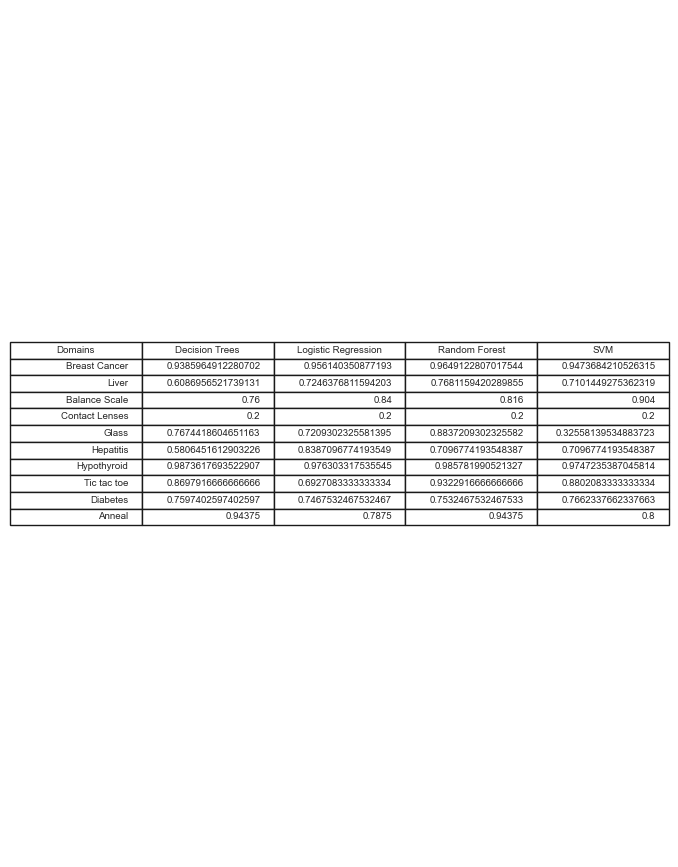

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


df = results

# create a pdf file
with PdfPages('./Figures/rank_table.pdf') as pdf:
    # create a table from the dataframe
    fig, ax = plt.subplots(figsize=(8.5, 11))
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    # add the table to the pdf file
    pdf.savefig(fig, bbox_inches='tight')


## Friedman Test

In [28]:
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import friedmanchisquare as friedman

In [29]:
statistic, p_value = friedman(results['Decision Trees'], results['Logistic Regression'], results['Random Forest'], results['SVM'])

In [30]:
# Print the results
print('Friedman statistic:', statistic)
print('p-value:', p_value)

Friedman statistic: 3.988636363636353
p-value: 0.26269381474873277


In [31]:
statistic

3.988636363636353

In [32]:
p_value

0.26269381474873277

## Nemenyi Test

In [1]:
# Importing libraries
from scipy import stats
import scikit_posthocs as sp
import numpy as np

In [6]:
data = np.array((results['Decision Trees'], results['Logistic Regression'], results['Random Forest'], results['SVM']))

In [7]:
# Conduct the Nemenyi post-hoc test
test_result = sp.posthoc_nemenyi_friedman(data.T)
test_result.columns = ['Decision Trees','Logistic Regression', 'Random Forest', 'SVM']
test_result.index = ['Decision Trees','Logistic Regression', 'Random Forest', 'SVM']

### Pairwise Comparison 

In [8]:
test_result

,Decision Trees,Logistic Regression,Random Forest,SVM
Decision Trees,1.00000,0.900000,0.353570,0.900000
Logistic Regression,0.90000,1.000000,0.403706,0.900000
Random Forest,0.35357,0.403706,1.000000,0.555994
SVM,0.90000,0.900000,0.555994,1.000000


In [3]:
import pandas as pd

data = {
    'Domains': ['Breast Cancer', 'Liver', 'Balance Scale', 'Contact Lenses', 'Glass', 'Hepatitis', 'Hypothyroid', 'Tic tac toe', 'Diabetes', 'Anneal'],
    'Decision Trees': [0.938596, 0.608696, 0.760000, 0.200000, 0.767442, 0.580645, 0.987362, 0.869792, 0.759740, 0.943750],
    'Logistic Regression': [0.956140, 0.724638, 0.840000, 0.200000, 0.720930, 0.838710, 0.976303, 0.692708, 0.746753, 0.787500],
    'Random Forest': [0.964912, 0.768116, 0.816000, 0.200000, 0.883721, 0.709677, 0.985782, 0.932292, 0.753247, 0.943750],
    'SVM': [0.947368, 0.710145, 0.904000, 0.200000, 0.325581, 0.709677, 0.974724, 0.880208, 0.766234, 0.800000]
}

df = pd.DataFrame(data)

# To save it to a CSV file:
df.to_csv('data.csv', index=False)

In [4]:
results = pd.read_csv('data.csv')

In [5]:
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
0,Breast Cancer,0.938596,0.956140,0.964912,0.947368
1,Liver,0.608696,0.724638,0.768116,0.710145
2,Balance Scale,0.760000,0.840000,0.816000,0.904000
3,Contact Lenses,0.200000,0.200000,0.200000,0.200000
4,Glass,0.767442,0.720930,0.883721,0.325581
5,Hepatitis,0.580645,0.838710,0.709677,0.709677
6,Hypothyroid,0.987362,0.976303,0.985782,0.974724
7,Tic tac toe,0.869792,0.692708,0.932292,0.880208
8,Diabetes,0.759740,0.746753,0.753247,0.766234
9,Anneal,0.943750,0.787500,0.943750,0.800000


In [9]:
import matplotlib.pyplot as plt

names = ["Decision Trees", "Logistic Regression", "Random Forest", "SVM"]
avranks = [2.4, 2.0, 2.8, 2.8]

In [10]:
import pandas as pd

data = {
    'Domains': ['Breast Cancer', 'Liver', 'Balance Scale', 'Contact Lenses', 'Glass', 'Hepatitis', 'Hypothyroid', 'Tic tac toe', 'Diabetes', 'Anneal'],
    'Decision Trees': [0.938596, 0.608696, 0.760000, 0.200000, 0.767442, 0.580645, 0.987362, 0.869792, 0.759740, 0.943750],
    'Logistic Regression': [0.956140, 0.724638, 0.840000, 0.200000, 0.720930, 0.838710, 0.976303, 0.692708, 0.746753, 0.787500],
    'Random Forest': [0.964912, 0.768116, 0.816000, 0.200000, 0.883721, 0.709677, 0.985782, 0.932292, 0.753247, 0.943750],
    'SVM': [0.947368, 0.710145, 0.904000, 0.200000, 0.325581, 0.709677, 0.974724, 0.880208, 0.766234, 0.800000]
}

df = pd.DataFrame(data)
df.set_index('Domains', inplace=True)

averages = df.mean()
print(averages)


Decision Trees         0.741602
Logistic Regression    0.748368
Random Forest          0.795750
SVM                    0.721794
dtype: float64


In [11]:
import statsmodels.api as sa
import scikit_posthocs as sp

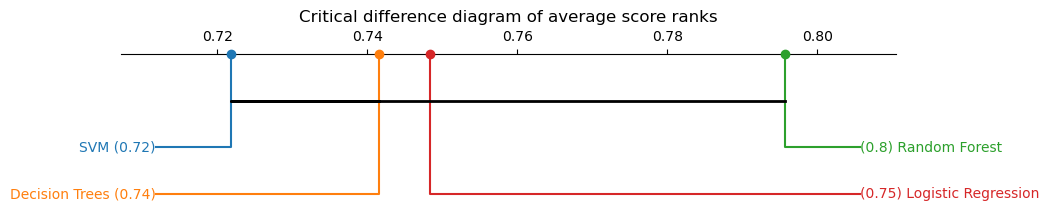

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import pandas as pd

names = ["Logistic Regression", "Random Forest", "SVM", "Decision Trees"]
avranks = [0.748368, 0.795750, 0.721794, 0.741602]

# Create a ranks Series with appropriate indices
ranks = pd.Series(avranks, index=names)


# 0 denotes no significant difference, 1 denotes significant difference
test_result_array = np.array([
    [0, 1, 0, 0],  
    [1, 0, 1, 1],  
    [0, 1, 0, 1],  
    [0, 1, 1, 0],  
])

# Convert to DataFrame with labeled indices
test_result = pd.DataFrame(test_result_array, index=names, columns=names)

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(ranks, test_result)
plt.savefig("Table3-5.pdf",format="pdf",bbox_inches="tight")
plt.show()


The diagram shows that Random Forest is significantly better ranked than all models

In [43]:
test_result

,Decision Trees,Logistic Regression,Random Forest,SVM
Decision Trees,1.00000,0.900000,0.353570,0.900000
Logistic Regression,0.90000,1.000000,0.403706,0.900000
Random Forest,0.35357,0.403706,1.000000,0.555994
SVM,0.90000,0.900000,0.555994,1.000000


### Bonferroni Correction

We performed 4 different classifiers on a given domain, so the number of pairwise comparisons is n(n−1)/2, and therefore statistical tests would be 6.

The corrected significance level for each individual test would be 0.05/6 =  0.00833

This means that to reject the null hypothesis for any individual test, the p-value must be less than 0.00833 instead of 0.05.

The test_result DataFrame returned by the Nemenyi post-hoc test contains the pairwise comparison results for the classifiers. Specifically, each element in the DataFrame represents the p-value for the Nemenyi test for the pair of classifiers corresponding to that row and column.

To interpret the results, you can compare the p-values in the test_result DataFrame against a significance level (e.g., 0.05). If the p-value for a pairwise comparison is less than the significance level, then you can reject the null hypothesis that the two classifiers have equal performance. In other words, you can conclude that the two classifiers perform differently.

<AxesSubplot:>

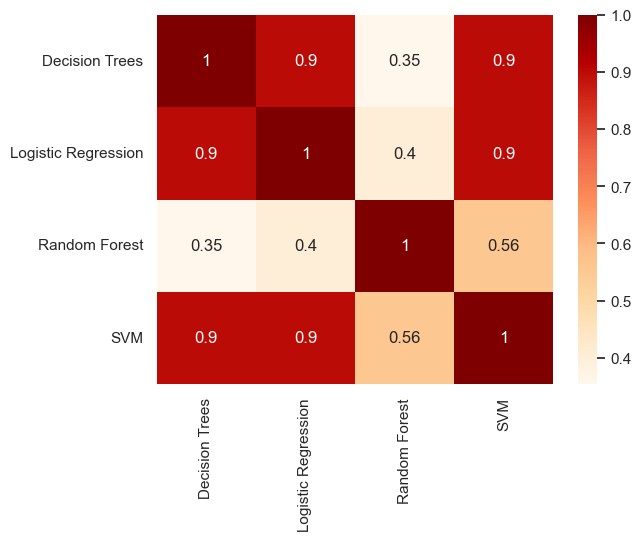

In [104]:
import seaborn as sns
sns.heatmap(test_result, annot=True, cmap='OrRd')


## Paired_ttest_resample: Resampled Paired t test

In [105]:
# Using Labor Negotiations Data:

def read_in(link, row_start, nrows):
    return pd.read_csv(link, skiprows=row_start, nrows=nrows, on_bad_lines="skip", delim_whitespace=" ",
                       index_col="#", na_values="*")

# Training Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.data"
good1 = read_in(link,row_start=152, nrows=18)
good2 = read_in(link,row_start=173, nrows=18)
good3 = read_in(link,row_start=194, nrows=18)
good = good1.join(good2)
good = good.join(good3)
bad1 = read_in(link,row_start=216, nrows=9)
bad2 = read_in(link,row_start=228, nrows=9)
bad3 = read_in(link,row_start=240, nrows=9)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(19,28)

train = pd.concat([good,bad])
train["status"] = train.index <= 18
train.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,status
1,2,3.0,7.0,NaN,NaN,38.0,NaN,12.0,25.0,True,11.0,ba,True,half,True,NaN,True
2,2,4.0,5.0,NaN,tcf,35.0,NaN,13.0,5.0,NaN,15.0,gnr,NaN,NaN,NaN,NaN,True
3,2,4.5,5.8,NaN,NaN,35.0,ret_allw,NaN,NaN,True,11.0,ba,NaN,full,NaN,full,True
4,2,7.0,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,True,full,NaN,NaN,True
5,2,4.3,4.4,NaN,NaN,38.0,NaN,NaN,4.0,NaN,12.0,gnr,NaN,full,NaN,full,True


In [106]:
# Test Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.test"
good1 = read_in(link,row_start=157, nrows=19)
good2 = read_in(link,row_start=179, nrows=19)
good3 = read_in(link,row_start=201, nrows=19)
good = good1.join(good2)
good = good.join(good3)

bad1 = read_in(link,row_start=223, nrows=11)
bad2 = read_in(link,row_start=237, nrows=11)
bad3 = read_in(link,row_start=251, nrows=11)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(20,31)

test = pd.concat([good,bad])
test["status"] = test.index <= 19

In [107]:
print(train.shape)

(27, 17)


In [108]:
print(test.shape)

(30, 17)


### Combine Train and Test

In [109]:

from sklearn.preprocessing import OneHotEncoder
from numpy import concatenate

combined = pd.concat([train,test]).reset_index().drop("index",axis=1)# Combine train and test
tmp = combined.select_dtypes(include="object") # Convert to one hot
one_hot = pd.get_dummies(tmp)


#X = combined[["dur","wage1"]].drop(41).to_numpy("int32") # NaN in the row 41
tmp = combined.drop("status", axis=1).select_dtypes(include="float64")

### Handle Empty Values

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# These values being missing is indicative of them being absent from the agreements.
needs_zeros = ["dur","wage1", "wage2", "wage3", "stby_pay", "shift_diff"]
# Only 6 are missing.  In the cases where they are missing, it is more likely actually missing than actually zero.
needs_avg = ["hours"]
# Today in Canada there are 10 federal work holidays.  Some of the entries have only 9, so I will impute that value.
needs_min = ["holidays"] 

imp_zeros = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=0)
imp_avg = SimpleImputer(missing_values=float("nan"), strategy="mean")
imp_min = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=9)

imp = ColumnTransformer(transformers=[("zeros", imp_zeros, needs_zeros), ("avg", imp_avg, needs_avg), 
                                     ("min", imp_min, needs_min)])
imp.fit(tmp)
tmp = imp.transform(tmp)

#### Combine Numerical and Categorical

In [111]:
from sklearn.preprocessing import scale
tmp = scale(tmp)
X_10 = concatenate((tmp,one_hot),axis=1)
y_10 = combined[["status"]].to_numpy("int32")

## Paired_ttest_5x2cv: 5x2cv paired t test for classifier comparisons

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = SVC(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_10, y_10.ravel(), test_size=0.25, random_state=123)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)
score2 = clf2.fit(X_train, y_train).score(X_test, y_test)
score3 = clf3.fit(X_train, y_train).score(X_test, y_test)

print('Logistic regression accuracy: %.2f%%' % (score1 * 100))
print('Decision tree accuracy: %.2f%%' % (score2 * 100))
print('SVM accuracy: %.2f%%' % (score3*100))

Logistic regression accuracy: 73.33%
Decision tree accuracy: 53.33%
SVM accuracy: 80.00%


Let's assume a significance threshold of α=0.05
for rejecting the null hypothesis that both algorithms perform equally well on the dataset and conduct the 5x2cv t test:

In [113]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=clf1,
                              estimator2=clf2,
                              X=X_10, y=y_10.ravel(),
                              random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 0.000
p value: 1.000


Since p > α we therefore, fail to reject the null hypothesis and conclude that the performance of the two algorithms is not significantly different.

## Combined_ftest_5x2cv: 5x2cv combined F test for classifier comparisons

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = SVC(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_10, y_10.ravel(), test_size=0.25,
random_state=123)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)
score2 = clf2.fit(X_train, y_train).score(X_test, y_test)
score3 = clf3.fit(X_train, y_train).score(X_test, y_test)

print('Logistic regression accuracy: %.2f%%' % (score1 * 100))
print('Decision tree accuracy: %.2f%%' % (score2 * 100))
print('SVM accuracy: %.2f%%' % (score3*100))

Logistic regression accuracy: 73.33%
Decision tree accuracy: 53.33%
SVM accuracy: 80.00%


Now, let's assume a significance threshold of α=0.05
 for rejecting the null hypothesis that both algorithms perform equally well on the dataset and conduct the 5x2cv f test:

In [115]:
from mlxtend.evaluate import combined_ftest_5x2cv


f, p = combined_ftest_5x2cv(estimator1=clf1,
                            estimator2=clf2,
                            X=X_10, y=y_10.ravel(),
                            random_seed=1)

print('F statistic: %.3f' % f)
print('p value: %.3f' % p)

F statistic: 1.252
p value: 0.425


Since p > α we therefore, fail to reject the null hypothesis and conclude that the performance of the two algorithms is not significantly different.

In [116]:
y_true = y_test

In [117]:
# get its classifications on the test set
class_a = clf1.predict(X_test)

class_b = clf2.predict(X_test)
class_c = clf3.predict(X_test)

In [118]:
y_true

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

## Cochrane's Q test

In [119]:
import numpy as np
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

y_true_1d = y_true.ravel()
class_a_1d = class_a.ravel()
class_b_1d = class_b.ravel()
class_c_1d = class_c.ravel()

q, p_value = cochrans_q(y_true_1d, 
                        class_a_1d, 
                        class_b_1d, 
                        class_c_1d)

print('Q: %.3f' % q)
print('p-value: %.3f' % p_value)


Q: 1.500
p-value: 0.472


## McNemar Test

In [120]:
tb = mcnemar_table(y_target=y_true_1d, 
                   y_model1=class_a_1d, 
                   y_model2=class_b_1d)

In [121]:
tb

array([[13,  0],
       [ 1,  1]])

In [122]:
from mlxtend.evaluate import mcnemar

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 0.0
p-value: 1.0


Since the p-value is larger than our assumed significance threshold (α=0.05
), we cannot reject our null hypothesis and assume that there is no significant difference between the two predictive models.

#### Let's illustrate that Cochran's Q test is indeed just a generalized version of McNemar's test:

In [123]:
chi2, p_value = cochrans_q(y_true_1d, 
                           class_a_1d, 
                           class_b_1d)

print('Cochran\'s Q Chi^2: %.3f' % chi2)
print('Cochran\'s Q p-value: %.3f' % p_value)

Cochran's Q Chi^2: 1.000
Cochran's Q p-value: 0.317


In [124]:
chi2, p_value = mcnemar(mcnemar_table(y_true_1d, 
                                      class_a_1d, 
                                      class_b_1d),
                        corrected=False)

print('McNemar\'s Chi^2: %.3f' % chi2)
print('McNemar\'s p-value: %.3f' % p_value)

McNemar's Chi^2: 1.000
McNemar's p-value: 0.317


## The Corrected Resampled t-test

[source: github](https://gist.github.com/jensdebruijn/13e8eeda85eb8644ac2a4ac4c3b8e732)

In [125]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_samples, n_test_samples, alpha):
    n = len(data1)
    differences = [(data1[i] - data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_samples / n_training_samples  
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

def compare_classifiers(X, y, clf1, clf2, n_splits, n_repeats, alpha):
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    diff_scores = []
    for train_index, test_index in rkf.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        clf1.fit(X_train, y_train)
        clf2.fit(X_train, y_train)
        y_pred1 = clf1.predict(X_test)
        y_pred2 = clf2.predict(X_test)
        score1 = accuracy_score(y_test, y_pred1)
        score2 = accuracy_score(y_test, y_pred2)
        diff_scores.append(score1 - score2)
    t_stat, df, cv, p = corrected_dependent_ttest(diff_scores, [0] * len(diff_scores), n_training_samples=len(train_index), n_test_samples=len(test_index), alpha=alpha)
    return t_stat, df, cv, p


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)

t_stat, df, cv, p = compare_classifiers(X_10, y_10.ravel(), clf1, clf2, n_splits=5, n_repeats=10, alpha=0.05)


In [127]:
t_stat

1.1582609109455808

In [128]:
p

0.25237183943710306

Now, let's assume a significance threshold of α=0.05 for rejecting the null hypothesis that both algorithms perform equally well on the dataset

The p-value is greater than the chosen level of significance, we fail to reject the null hypothesis and conclude that there is not enough evidence to say that one classifier is better than the other.

In [129]:
df

49

In [130]:
cv

1.6765508919142629

## Confidence Intervals for the difference

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Load breast cancer dataset

X, y = X_0, y_0

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=0)

# Initialize classifiers
clf1 = DecisionTreeClassifier()
clf2 = SVC()

# Evaluate classifiers on test set and calculate difference in performance
diff = []
for i in range(1000):
    # Resample training set with replacement
    resampled_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_train_resampled = X_train[resampled_indices]
    y_train_resampled = y_train[resampled_indices]
    
    # Train classifiers on resampled training set
    clf1.fit(X_train_resampled, y_train_resampled)
    clf2.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate classifiers on test set and calculate difference in performance
    score1 = clf1.score(X_test, y_test)
    score2 = clf2.score(X_test, y_test)
    diff.append(score1 - score2)

# Calculate mean and standard deviation of difference in performance
mean_diff = np.mean(diff)
std_diff = np.std(diff)

# Calculate 95% confidence interval
lower_bound = mean_diff - 1.96 * std_diff
upper_bound = mean_diff + 1.96 * std_diff
print("95% confidence interval: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))


95% confidence interval: [-0.0631, 0.0389]


In [132]:
def plot_CI(x, CI):
    top = CI[1]
    bottom = CI[0]
#     middle = CI[2]
    width = 0.1
    left = x - width/2
    right = x + width/2
    plt.plot([x,x], [top, bottom], color="k", lw=3)
    plt.plot([left,right], [top,top], color="k", lw=3)
    plt.plot([left,right], [bottom,bottom], color="k", lw=3)
#     plt.plot(x,middle, "ok", lw=3)

In [133]:
ci_dt_svm = [lower_bound, upper_bound]

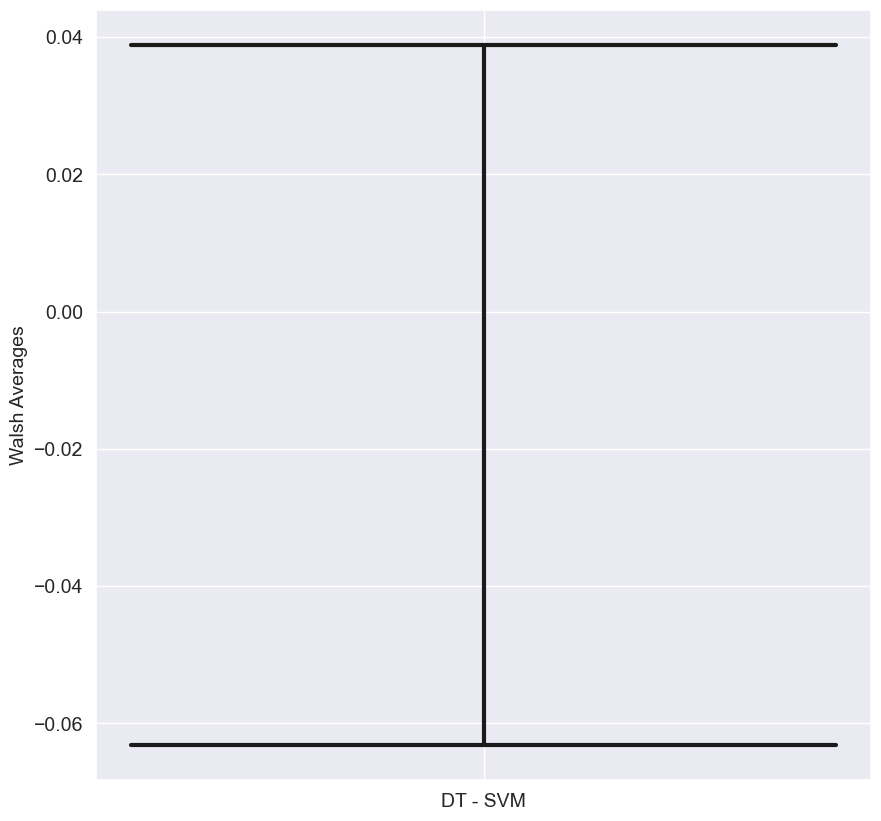

In [134]:
plt.figure(figsize=(10,10))
plt.xticks([1], ['DT - SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt_svm)
plt.ylabel("Walsh Averages", fontsize=14)
plt.savefig("./Figures/Figure1-2.pdf",format="pdf")
plt.show()

## The 10X10 CV test Bouckaert (2003)

In [135]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

# Breast Cancer data
X = X_0
y = y_0

# Set the number of runs and folds
r = 10
k = 10

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an array to hold the empirical error estimates
dt_errors = np.zeros((r, k))
svm_errors = np.zeros((r, k))

# Perform r runs of k-fold cross-validation for Decision Tree and SVM
for i in range(r):
    # Shuffle the data
    idx = np.random.permutation(len(y))
    X_shuffled = X[idx]
    y_shuffled = y[idx]
    
    # Perform k-fold cross-validation for Decision Tree
    j = 0
    for train_index, test_index in kf.split(X_shuffled):
        # Train a Decision Tree model on the training data
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_shuffled[train_index], y_shuffled[train_index])
        
        # Evaluate the model on the test data and record the empirical error estimate
        dt_errors[i,j] = 1 - dt_model.score(X_shuffled[test_index], y_shuffled[test_index])
        
        j += 1

    # Perform k-fold cross-validation for SVM
    j = 0
    for train_index, test_index in kf.split(X_shuffled):
        # Train an SVM model on the training data
        svm_model = SVC()
        svm_model.fit(X_shuffled[train_index], y_shuffled[train_index])
        
        # Evaluate the model on the test data and record the empirical error estimate
        svm_errors[i,j] = 1 - svm_model.score(X_shuffled[test_index], y_shuffled[test_index])
        
        j += 1

# Calculate the average empirical error estimate for each run for Decision Tree and SVM
dt_avg_errors = np.mean(dt_errors, axis=1)
svm_avg_errors = np.mean(svm_errors, axis=1)

# Calculate the differences between the average empirical error estimates for each pair of runs for Decision Tree and SVM
dt_differences = np.zeros((r*(r-1)//2,))
svm_differences = np.zeros((r*(r-1)//2,))
idx = 0
for i in range(r-1):
    for j in range(i+1, r):
        dt_differences[idx] = abs(dt_avg_errors[i] - dt_avg_errors[j])
        svm_differences[idx] = abs(svm_avg_errors[i] - svm_avg_errors[j])
        idx += 1

# Calculate the average difference of the empirical error estimates for Decision Tree and SVM
dt_avg_diff = np.mean(dt_differences)
svm_avg_diff = np.mean(svm_differences)

print("Decision Tree - Average difference of the empirical error estimates: {:.4f}".format(dt_avg_diff))
print("SVM - Average difference of the empirical error estimates: {:.4f}".format(svm_avg_diff))


Decision Tree - Average difference of the empirical error estimates: 0.0121
SVM - Average difference of the empirical error estimates: 0.0032


## 6.3 Estimation Statistics: Effect Size, Power and Confidence Intervals
### 6.3.1 Confidence Intervals
*Non-Parametric Confidence Intervals*

#### Signed-Ranks Median Confidence Intervals technique associated with Wilcoxon’s Signed Rank Test and for use in the case of two classifiers compared over multiple domains.

In [136]:
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
1,Breast Cancer,0.938596,0.956140,0.964912,0.947368
2,Liver,0.608696,0.724638,0.768116,0.710145
3,Balance Scale,0.760000,0.840000,0.816000,0.904000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000
5,Glass,0.767442,0.720930,0.883721,0.325581
6,Hepatitis,0.580645,0.838710,0.709677,0.709677
7,Hypothyroid,0.987362,0.976303,0.985782,0.974724
8,Tic tac toe,0.869792,0.692708,0.932292,0.880208
9,Diabetes,0.759740,0.746753,0.753247,0.766234
10,Anneal,0.943750,0.787500,0.943750,0.800000


In [137]:
results["DT-LR"] = results["Decision Trees"] - results["Logistic Regression"]
results["DT-SVM"] = results["Decision Trees"] - results["SVM"]
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM,DT-LR,DT-SVM
1,Breast Cancer,0.938596,0.956140,0.964912,0.947368,-0.017544,-0.008772
2,Liver,0.608696,0.724638,0.768116,0.710145,-0.115942,-0.101449
3,Balance Scale,0.760000,0.840000,0.816000,0.904000,-0.080000,-0.144000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000
5,Glass,0.767442,0.720930,0.883721,0.325581,0.046512,0.441860
6,Hepatitis,0.580645,0.838710,0.709677,0.709677,-0.258065,-0.129032
7,Hypothyroid,0.987362,0.976303,0.985782,0.974724,0.011058,0.012638
8,Tic tac toe,0.869792,0.692708,0.932292,0.880208,0.177083,-0.010417
9,Diabetes,0.759740,0.746753,0.753247,0.766234,0.012987,-0.006494
10,Anneal,0.943750,0.787500,0.943750,0.800000,0.156250,0.143750


In [138]:
# drop row 4
results.drop(4, inplace=True)

In [139]:
results.index = np.arange(1, len(results) + 1)
results['Domain No.'] = results.index 

results.set_index('Domain No.', inplace = True)
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM,DT-LR,DT-SVM
Domain No.,,,,,,,
1,Breast Cancer,0.938596,0.956140,0.964912,0.947368,-0.017544,-0.008772
2,Liver,0.608696,0.724638,0.768116,0.710145,-0.115942,-0.101449
3,Balance Scale,0.760000,0.840000,0.816000,0.904000,-0.080000,-0.144000
4,Glass,0.767442,0.720930,0.883721,0.325581,0.046512,0.441860
5,Hepatitis,0.580645,0.838710,0.709677,0.709677,-0.258065,-0.129032
6,Hypothyroid,0.987362,0.976303,0.985782,0.974724,0.011058,0.012638
7,Tic tac toe,0.869792,0.692708,0.932292,0.880208,0.177083,-0.010417
8,Diabetes,0.759740,0.746753,0.753247,0.766234,0.012987,-0.006494
9,Anneal,0.943750,0.787500,0.943750,0.800000,0.156250,0.143750


In [140]:
def cal_walsh_averages(diff):
    # list of differences in mean performance
    diff_list = results[diff].tolist()
    
    # Calculate number of domains
    n = len(diff_list)

    # Initialize empty list of Walsh averages
    walsh_averages = []

    # Loop through all pairs of indices (i, j) with i <= j
    for i in range(n):
        for j in range(i, n):
            # Calculate Walsh average
            wij = (diff_list[i] + diff_list[j]) / 2.0
            walsh_averages.append(round(wij,4))
    return walsh_averages

In [141]:
# Print list of Walsh averages for DT-LR
walsh_averages_dt_lr = cal_walsh_averages('DT-LR')
print(walsh_averages_dt_lr)

[-0.0175, -0.0667, -0.0488, 0.0145, -0.1378, -0.0032, 0.0798, -0.0023, 0.0694, -0.1159, -0.098, -0.0347, -0.187, -0.0524, 0.0306, -0.0515, 0.0202, -0.08, -0.0167, -0.169, -0.0345, 0.0485, -0.0335, 0.0381, 0.0465, -0.1058, 0.0288, 0.1118, 0.0297, 0.1014, -0.2581, -0.1235, -0.0405, -0.1225, -0.0509, 0.0111, 0.0941, 0.012, 0.0837, 0.1771, 0.095, 0.1667, 0.013, 0.0846, 0.1562]


From the Wilcoxon Table n = 10 − 1 = 9 degrees of freedom, We recall that the difference between the two classifiers on domain 4 was 0, and that the difference was, thus, removed from our calculation. We
therefore now have n = 9. We find that the critical value for a two-tailed 95% and for n = 9 confidence interval is 5. We, therefore, look for the 5th smallest and the 5th largest Walsh average values:

In [142]:
sorted_walsh_averages_dt_lr = sorted(walsh_averages_dt_lr)

In [143]:
# 5th smallest
sorted_walsh_averages_dt_lr[4]

-0.1235

In [144]:
# 5th largest Walsh average
sorted_walsh_averages_dt_lr[-5]

0.1014

##### We repeat the above for classifiers A and C -  DT-SVM

In [145]:
# Print list of Walsh averages for DT-LR
walsh_averages_dt_svm = cal_walsh_averages('DT-SVM')
print(walsh_averages_dt_svm)

[-0.0088, -0.0551, -0.0764, 0.2165, -0.0689, 0.0019, -0.0096, -0.0076, 0.0675, -0.1014, -0.1227, 0.1702, -0.1152, -0.0444, -0.0559, -0.054, 0.0212, -0.144, 0.1489, -0.1365, -0.0657, -0.0772, -0.0752, -0.0001, 0.4419, 0.1564, 0.2272, 0.2157, 0.2177, 0.2928, -0.129, -0.0582, -0.0697, -0.0678, 0.0074, 0.0126, 0.0011, 0.0031, 0.0782, -0.0104, -0.0085, 0.0667, -0.0065, 0.0686, 0.1437]


In [146]:
sorted_walsh_averages_dt_svm = sorted(walsh_averages_dt_svm)

In [147]:
# 5th smallest
sorted_walsh_averages_dt_svm[4]

-0.1152

In [148]:
# 5th largest Walsh average
sorted_walsh_averages_dt_svm[-5]

0.2165

In [149]:
def plot_CI(x, CI):
    top = CI[1]
    bottom = CI[0]
    middle = CI[2]
    width = 0.1
    left = x - width/2
    right = x + width/2
    plt.plot([x,x], [top, bottom], color="k", lw=3)
    plt.plot([left,right], [top,top], color="k", lw=3)
    plt.plot([left,right], [bottom,bottom], color="k", lw=3)
    plt.plot(x,middle, "ok", lw=3)

In [150]:
ci_dt_lr = [sorted_walsh_averages_dt_lr[4], sorted_walsh_averages_dt_lr[-5],
        np.median(results['DT-LR'])]
ci_dt_svm = [sorted_walsh_averages_dt_svm[4], sorted_walsh_averages_dt_svm[-5], np.median(results['DT-SVM'])]


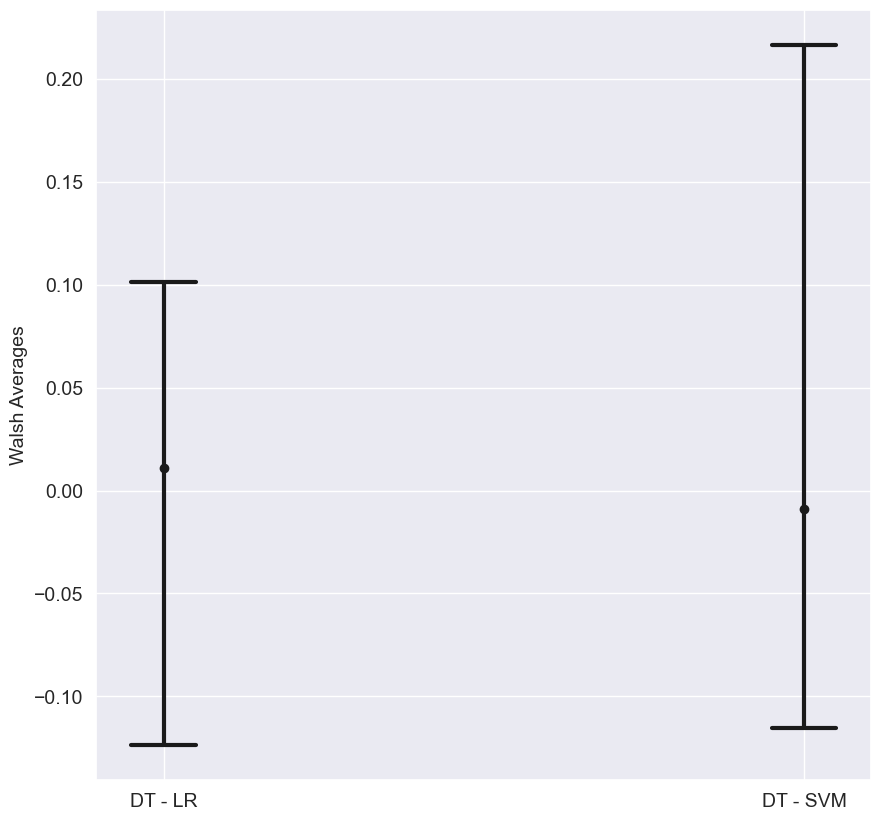

In [151]:
plt.figure(figsize=(10,10))
plt.xticks([1, 2], ['DT - LR', 'DT - SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt_lr)
plot_CI(2,ci_dt_svm)
plt.ylabel("Walsh Averages", fontsize=14)
plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

In [152]:
from numpy import mean
from numpy import median
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
from numpy.random import randint

# seed the random number generator
seed(1)

# generate dataset
dataset = 0.5 + rand(1000) * 0.5

# bootstrap
scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 1000)
    sample = dataset[indices]
    # calculate and store statistic
    statistic = mean(sample)
    scores.append(statistic)

# print median
print('50th percentile (median) = %.3f' % median(scores))

# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0

# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0

# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))

# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)

# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))


50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757


In [153]:
# Get Data:
def read_in(link, row_start, nrows):
    return pd.read_csv(link, skiprows=row_start, nrows=nrows, on_bad_lines="skip", delim_whitespace=" ",
                       index_col="#", na_values="*")

# Training Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.data"
good1 = read_in(link,row_start=152, nrows=18)
good2 = read_in(link,row_start=173, nrows=18)
good3 = read_in(link,row_start=194, nrows=18)
good = good1.join(good2)
good = good.join(good3)
bad1 = read_in(link,row_start=216, nrows=9)
bad2 = read_in(link,row_start=228, nrows=9)
bad3 = read_in(link,row_start=240, nrows=9)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(19,28)

train = pd.concat([good,bad])
train["status"] = train.index <= 18


In [154]:
# Test Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.test"
good1 = read_in(link,row_start=157, nrows=19)
good2 = read_in(link,row_start=179, nrows=19)
good3 = read_in(link,row_start=201, nrows=19)
good = good1.join(good2)
good = good.join(good3)

bad1 = read_in(link,row_start=223, nrows=11)
bad2 = read_in(link,row_start=237, nrows=11)
bad3 = read_in(link,row_start=251, nrows=11)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(20,31)

test = pd.concat([good,bad])
test["status"] = test.index <= 19


Combine train and test

In [155]:
from sklearn.preprocessing import OneHotEncoder
from numpy import concatenate

combined = pd.concat([train,test]).reset_index().drop("index",axis=1)# Combine train and test
tmp = combined.select_dtypes(include="object") # Convert to one hot
one_hot = pd.get_dummies(tmp)


#X = combined[["dur","wage1"]].drop(41).to_numpy("int32") # NaN in the row 41
tmp = combined.drop("status", axis=1).select_dtypes(include="float64")

Handle empty values:

In [156]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# These values being missing is indicative of them being absent from the agreements.
needs_zeros = ["dur","wage1", "wage2", "wage3", "stby_pay", "shift_diff"]
# Only 6 are missing.  In the cases where they are missing, it is more likely actually missing than actually zero.
needs_avg = ["hours"]
# Today in Canada there are 10 federal work holidays.  Some of the entries have only 9, so I will impute that value.
needs_min = ["holidays"] 

imp_zeros = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=0)
imp_avg = SimpleImputer(missing_values=float("nan"), strategy="mean")
imp_min = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=9)

imp = ColumnTransformer(transformers=[("zeros", imp_zeros, needs_zeros), ("avg", imp_avg, needs_avg), 
                                     ("min", imp_min, needs_min)])
imp.fit(tmp)
tmp = imp.transform(tmp)

Combine numerical and categorical

In [157]:
from sklearn.preprocessing import scale
tmp = scale(tmp)
X = concatenate((tmp,one_hot),axis=1)
y = combined[["status"]].to_numpy("int32")

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample

# Reconfigure to work with resample() function
df = pd.DataFrame(X)
df["y"] = y

n_iterations = 1000
n_X = X.shape[0]
errors_decision_tree = np.zeros((n_iterations,1))
errors_log_reg = np.zeros((n_iterations,1))
errors_svm = np.zeros((n_iterations,1))

np.random.seed(42)
for i in range(0,n_iterations):
    # Create Bootstrap
    train = resample(df, replace=True, n_samples=len(df))
    test = df[~df.index.isin(train.index)]
    # Split
    X_train = train.loc[:,0:28]
    y_train = train["y"]
    X_test = test.loc[:,0:28]  # <-- fix here
    y_test = test["y"]  # <-- fix here
    # Initialize Classifiers
    DT = DecisionTreeClassifier()
    LR = LogisticRegression()
    SV = SVC()
    # Fit + Store Errors
    predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
    errors_decision_tree[i] = (len(y_test) - sum(predictions == y_test)) / len(y_test)  # <-- fix here
    predictions = LR.fit(X_train, y_train.ravel()).predict(X_test)
    errors_log_reg[i] =  (len(y_test) - sum(predictions == y_test)) / len(y_test)  # <-- fix here
    predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
    errors_svm[i] = (len(y_test) - sum(predictions == y_test)) / len(y_test)  # <-- fix here


In [159]:
def plot_CI(x, CI):
    top = CI[1]
    bottom = CI[0]
    middle = CI[2]
    width = 0.1
    left = x - width/2
    right = x + width/2
    plt.plot([x,x], [top, bottom], color="k", lw=3)
    plt.plot([left,right], [top,top], color="k", lw=3)
    plt.plot([left,right], [bottom,bottom], color="k", lw=3)
    plt.plot(x,middle, "ok", lw=3)

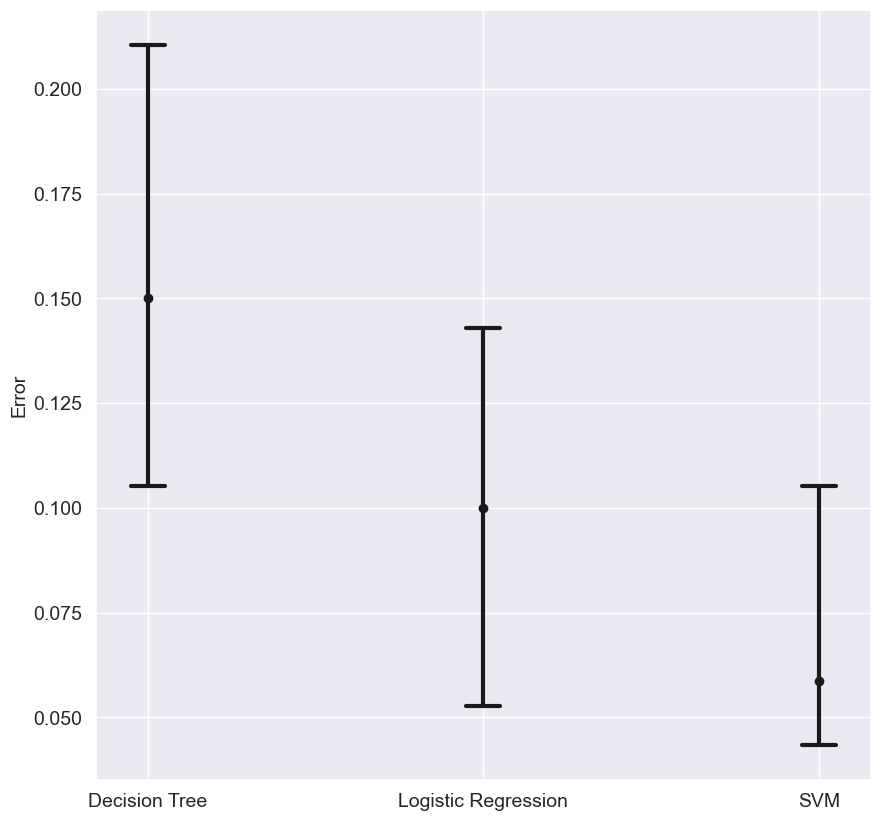

In [160]:
ci_dt = [np.percentile(errors_decision_tree, 25), np.percentile(errors_decision_tree, 75),
        np.median(errors_decision_tree)]
ci_lr = [np.percentile(errors_log_reg, 25), np.percentile(errors_log_reg, 75), np.median(errors_log_reg)]
ci_svm = [np.percentile(errors_svm, 25), np.percentile(errors_svm, 75), np.median(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
plt.savefig("./Figures/Figure1-5.pdf",format="pdf")
plt.show()

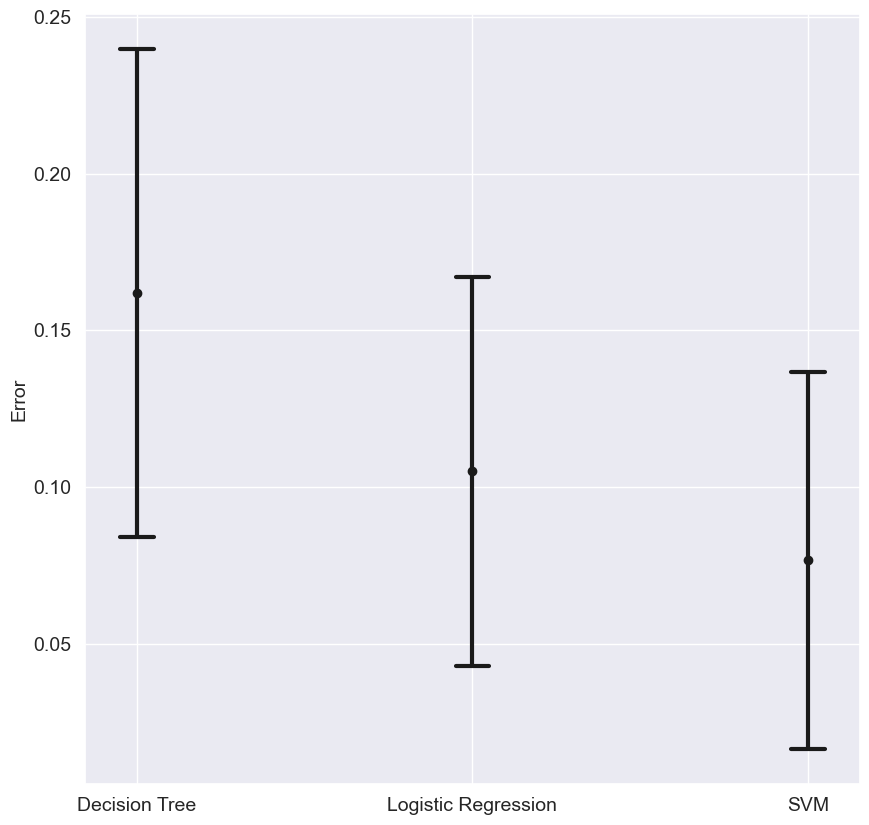

In [161]:
ci_dt = [np.mean(errors_decision_tree) - np.std(errors_decision_tree), 
         np.mean(errors_decision_tree) + np.std(errors_decision_tree),
        np.mean(errors_decision_tree)]
ci_lr = [np.mean(errors_log_reg) - np.std(errors_log_reg), 
         np.mean(errors_log_reg) + np.std(errors_log_reg),
         np.mean(errors_log_reg)]
ci_svm = [np.mean(errors_svm) - np.std(errors_svm), 
         np.mean(errors_svm) + np.std(errors_svm), np.mean(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
#plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

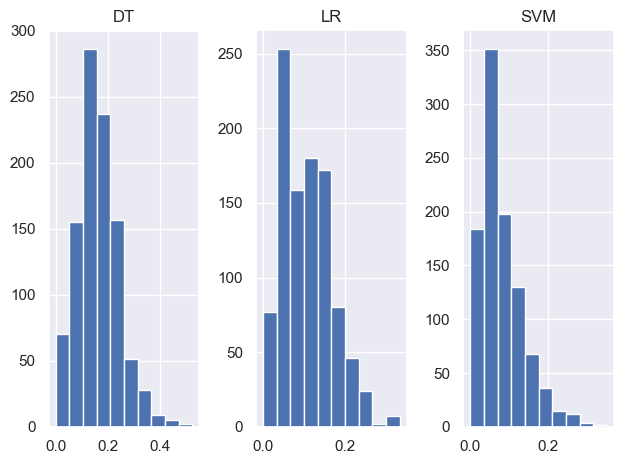

In [162]:
plt.subplot(131)
plt.hist(errors_decision_tree)
plt.title("DT")
plt.subplot(132)
plt.hist(errors_log_reg)
plt.title("LR")
plt.subplot(133)
plt.hist(errors_svm)
plt.title("SVM")

plt.tight_layout()
plt.show()

### 6.3.2 Effect Size



In [163]:
ci_dt

[0.08394111587322042, 0.2397826507311189, 0.16186188330216966]

### Effect size associated with the t-test: Cohen’s d statistic

In [164]:
def cohen_statistic(clf1, clf2):
    diff = np.mean(DT_all) - np.mean(SVM_all)
    var_dt = np.var(DT_all)
    var_svm = np.var(SVM_all)

    cohens_D = diff / np.sqrt((var_dt + var_svm)/2)
    return  cohens_D
    

In [165]:
# The model metrics for this text come from the experiment in 1.3
DT_all = np.loadtxt("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_I/Chapter-1-Statistics-Overview/DT_all.csv?token=GHSAT0AAAAAAB6ALPEIIOENWFW6VAMSEQHWY7T7D4A")
SVM_all = np.loadtxt("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_I/Chapter-1-Statistics-Overview/SVM_all.csv?token=GHSAT0AAAAAAB6ALPEJABXHMB6J4N7G7YEOY7T7EJQ")

cohen_statistic(DT_all, SVM_all)

2.009648718827902

From Cohen’s guidelines, we conclude that since dcohen > 0.8, the effect size is large. That
is, the difference in the means of the two populations, and hence, the performance of the
two classifiers do differ in a practically important way.

### Effect Size associated with Wilcoxon’s Signed Rank Test

In [166]:
from scipy.stats import wilcoxon

# extract differences and remove ties
differences = results_wilcoxon.loc[results_wilcoxon["NB-SVM"] != 0, "NB-SVM"]
differences = differences[differences != 0]

# perform Wilcoxon signed-ranks test
statistic, pvalue = wilcoxon(differences)

print("Wilcoxon signed-ranks test")
print("--------------------------")
print(f"Number of non-zero differences: {len(differences)}")
print(f"Sum of ranks of positive differences: {results_wilcoxon.loc[results_wilcoxon['NB-SVM'] > 0, 'Ranks(|NB-SVM|)'].sum()}")
print(f"Sum of ranks of negative differences: {results_wilcoxon.loc[results_wilcoxon['NB-SVM'] < 0, 'Ranks(|NB-SVM|)'].sum()}")
print(f"Wilcoxon signed-ranks statistic: {statistic}")
print(f"p-value: {pvalue}")


Wilcoxon signed-ranks test
--------------------------
Number of non-zero differences: 8
Sum of ranks of positive differences: 8
Sum of ranks of negative differences: 28
Wilcoxon signed-ranks statistic: 8.0
p-value: 0.1953125


### Rank biserial correlation coefficient or r-value

In [167]:
def rank_biserial_corr_coeff(R1 = 8, R2 = 28, T = 8, n = 8):
    """
    R1 corresponds to the sum of ranks with positive signs (sum of ranks of positive values)
    R2 corresponds to the sum of ranks with negative signs (sum of ranks of negative values)
    T corresponds to the smaller of the two values (R1 or R2 )
    n corresponds to the total sample size, i.e., the number of domains on which the two classifiers
    are being compared
    """
    
    r = (4 * (np.abs(T - (R1 + R2) / 2))) / (n + (n + 1))
    
    return r


In [168]:
rank_biserial_corr_coeff()

2.3529411764705883

Since |r| ≥ 0.5 then the effect is large.This effect size, however, should not be taken too seriously
given that we do not have enough evidence that the values with which it was calculated can
be relied upon, given that the null hypothesis was not rejected.


### Effect Size associated with Friedman’s Test

 Kendall’s W test value

In [169]:
# Friedman test statistic value
# 3.9204545454545325

def effect_size_friedman(χ = 3.92, N = 10, k =  4):
    """
    W corresponds to the Kendall’s W test value
    χ2 corresponds to the Friedman test statistic value
    N corresponds to the sample size, i.e., the number of domains on which the comparison is
    being carried out.
    k corresponds to the number of measurements per subject, i.e., the number of learning
algorithms being compared in this experiment.
    """
    W = (χ ** 2) / (N * (k - 1))
    return W

In [170]:
effect_size_friedman()

0.5122133333333333

## Power Analysis

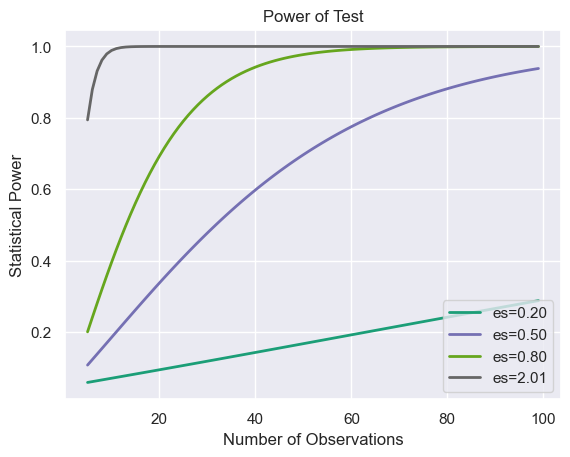

In [171]:
import pandas as pd
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower


# extract the two groups that you want to compare
group1 = DT_all
group2 = SVM_all

# compute the effect size of the difference between the two groups using Cohen’s
effect_size = cohen_statistic(group1, group2)

# define an array of effect sizes to analyze
effect_sizes = array([0.2, 0.5,0.8, effect_size])

# define an array of sample sizes to analyze
sample_sizes = array(range(5, 100))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)

# set background color to white
fig = pyplot.gcf()
fig.patch.set_facecolor('white')
pyplot.ylabel('Statistical Power')

pyplot.show()


In [172]:
from statsmodels.stats.power import TTestIndPower

# Parameters for power analysis
effect_size = 0.5 # standardized effect size
alpha = 0.05 # significance level
power = 0.8 # desired power

# Perform power analysis
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

# Print results
print('Sample size per group:', int(sample_size))

# Calculate total sample size for two classifiers on two domains
total_sample_size = 2 * 2 * sample_size # 2 classifiers x 2 domains
print('Total sample size:', int(total_sample_size))

Sample size per group: 63
Total sample size: 255


## Example: Comparing Bayesian and NHST for Two Classifiers on One Domain

#### Install the bayesian testing package

In [173]:
# pip install git+https://github.com/janezd/baycomp
# OR
# pip install baycomp 

#### Load the UCI Breast Cancer Dataset if not done prior

In [174]:
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X = bc_data.iloc[:,2:33].to_numpy()
y= bc_data.iloc[:,1].to_numpy()

#### Perform 30x10 CV for Decision Tree and SVM (modify procedure from Chapter 1), not averaging by run for this example

In [175]:
from numpy.random import seed, choice
# Test size is 57
seed(42)
n_trials = 30
ind_list = []
for trial in range(n_trials):
    ind = []
    for i in range(10):
        ind.append(choice(X.shape[0] - 1, 57,replace=False))
    ind_list.append(ind)

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

n_trials = 30
n_folds = 10
accuracies_dt = np.zeros((1,n_trials*n_folds))
accuracies_svm = np.zeros((1,n_trials*n_folds))
for trial in range(n_trials):
    accuracies_dt_ = np.zeros((1,n_folds))
    accuracies_svm_ = np.zeros((1,n_folds))
    for i in range(n_folds):
        test_idx = list(ind_list[trial][i])
        train_idx = list(set(test_idx) ^ set(range(X.shape[0])))
        X_test = X[test_idx,:]
        y_test = y[test_idx]
        X_train = X[train_idx,:]
        y_train = y[train_idx]
        DT = DecisionTreeClassifier()
        SV = SVC()
        predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_dt_[0,i] = sum(predictions == y_test.T)/len(y_test)
        predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_svm_[0,i] = sum(predictions == y_test.T)/len(y_test)
        
    accuracies_dt[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_dt_
    accuracies_svm[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_svm_
accuracies_dt = accuracies_dt[0]
accuracies_svm = accuracies_svm[0]
diff = accuracies_dt - accuracies_svm

In [177]:
diff.shape

(300,)

## Bayesian Estimation Approach

### Comparison of two classifiers on a single domain.

In [178]:
import numpy as np
# Acc_svm =  np.loadtxt('SVM_all.csv',  delimiter=',', skiprows=0)
# Acc_dt = np.loadtxt('DT_all.csv', delimiter=',', skiprows=0)

Acc_dt = np.loadtxt("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_I/Chapter-1-Statistics-Overview/DT_all.csv?token=GHSAT0AAAAAAB6ALPEIIOENWFW6VAMSEQHWY7T7D4A")
Acc_svm = np.loadtxt("https://raw.githubusercontent.com/zoisboukouvalas/MachineLearningEvaluation_SecondEdition/main/Part_I/Chapter-1-Statistics-Overview/SVM_all.csv?token=GHSAT0AAAAAAB6ALPEJABXHMB6J4N7G7YEOY7T7EJQ")

names = ("SVM", "DT")
x=np.zeros((len(Acc_dt),2),'float')
x[:,0] = Acc_dt/100
x[:,1] = Acc_svm/100
#we consider the difference of accuracy scaled in (0,1)

In [179]:
import bayesiantests as bt
rope=0.01
left, within, right = bt.correlated_ttest(x, rope=rope,runs=5,verbose=True,names=names)

P(SVM > DT) = 4.803287967907187e-09, P(rope) = 0.9999999940674592, P(DT > SVM) = 1.129252802378744e-09


In [180]:
import baycomp as bt
import matplotlib.pyplot as plt
from baycomp import two_on_single

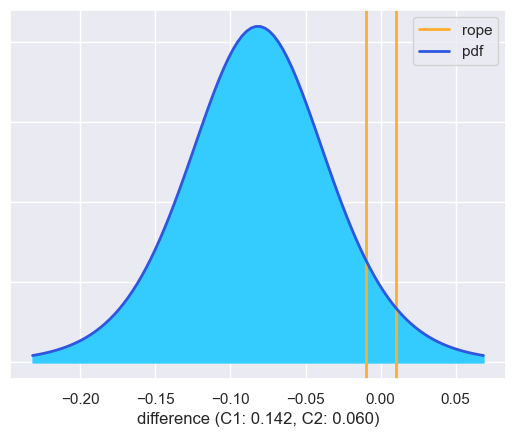

In [219]:
bayes_probs, bayes_plot = bt.two_on_single(Acc_dt, Acc_svm, runs=5, rope = 0.01, plot=True)
fig = pyplot.gcf()
fig.patch.set_facecolor('white')

In [182]:
bayes_probs

(0.9223238634450601, 0.038377157197592604, 0.039298979357347275)

## The high Density Intervals (HDIs)


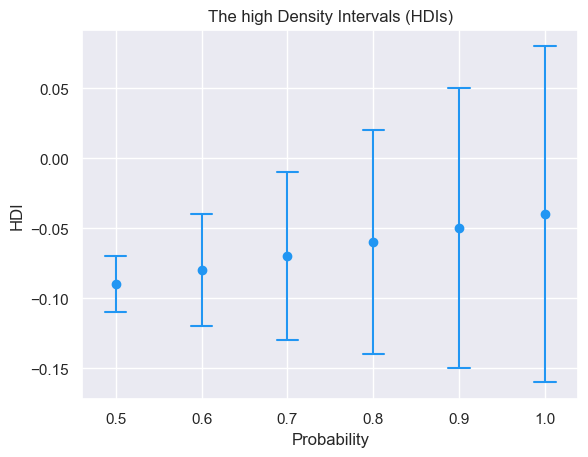

In [213]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt


def plot_hdi(x, values, z=1, color='#2196f3', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    for i in values:
        value = i
        top = mean - value
        bottom = mean + value

    left = x - horizontal_line_width / 2
    
    right = x + horizontal_line_width / 2
    
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#2196f3')

    return mean, value


intervals = np.linspace(-0.2, 0.2, num=6)
plt.xticks([1, 2, 3, 4, 5, 6], [0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('The high Density Intervals (HDIs)')
plot_hdi(1, np.linspace(-0.2, 0.02, num=6))
plot_hdi(2, np.linspace(-0.2, 0.04, num=6))
plot_hdi(3, np.linspace(-0.2, 0.06, num=6))
plot_hdi(4, np.linspace(-0.2, 0.08, num=6))
plot_hdi(5, np.linspace(-0.2, 0.1, num=6))
plot_hdi(6, np.linspace(-0.2, 0.12, num=6))
plt.ylabel('HDI')
plt.xlabel('Probability')

plt.show()

It shows us that 50% of the
data is concentrated in approximate interval [-0.098, -0.05], 60% of it is concentrated in
interval [-0.01, -0.02], etc... 

## Comparison of two classifiers on multiple domains

**Bayesian Sign Test - Bayesian version of the sign test and Wilcoxon’s signed ranked test,**

- x: a 2-d array with scores of two models (each row corresponding to a data set) or a vector of differences.
- rope: the region of practical equivalence. We consider two classifiers equivalent if the difference in their performance is smaller than rope.
- prior_strength: the prior strength for the Dirichlet distribution. Default is 1.
- prior_place: the region into which the prior is placed. Default is bayesiantests.ROPE, the other options are bayesiantests.LEFT and bayesiantests.RIGHT.
- nsamples: the number of Monte Carlo samples used to approximate the posterior.
- names: the names of the two classifiers; if x is a vector of differences, positive values mean that the second (right) model had a higher score.

In [183]:
import numpy as np
scores = np.loadtxt('acc_of_multiple_clf_ten_domains.csv', delimiter=',', skiprows=1, usecols=(1, 3))
names = ("SVM", "DT")

**Summarizing probabilities**

Function signtest(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000, verbose=False, names=('C1', 'C2')) computes the Bayesian sign test and returns the probabilities that the difference (the score of the first classifier minus the score of the first) is negative, within rope or positive.

In [184]:
import bayesiantests as bt
left, within, right = bt.signtest(scores, rope=0.01)
print(left, within, right)

0.40416 0.40062 0.19522


The first value (left) is the probability that the first classifier (the left column of x) has a higher score than the second (or that the differences are negative, if x is given as a vector).

In the above case, the right (AODE) performs worse than naive Bayes with a probability of 0.29, and they are practically equivalent with a probability of 0.71.

If we add arguments verbose and names, the function also prints out the probabilities.

In [185]:
left, within, right = bt.signtest(scores, rope=0.01, verbose=True, names=names)

P(SVM > DT) = 0.40346, P(rope) = 0.40168, P(DT > SVM) = 0.19486


The posterior distribution can be plotted out:

1. using the function signtest_MC(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000) we generate the samples of the posterior

2. using the function plot_posterior(samples,names=('C1', 'C2')) we then plot the posterior in the probability simplex

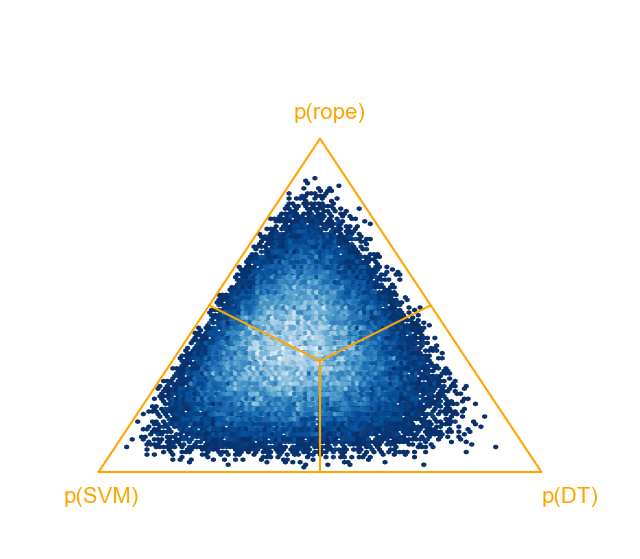

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

samples = bt.signtest_MC(scores, rope=0.01)

fig = bt.plot_posterior(samples,names)
plt.savefig('triangle.png',facecolor="white")
plt.show()

**Checking sensitivity to the prior**

To check the effect of the prior, let us a put a greater prior on the left.

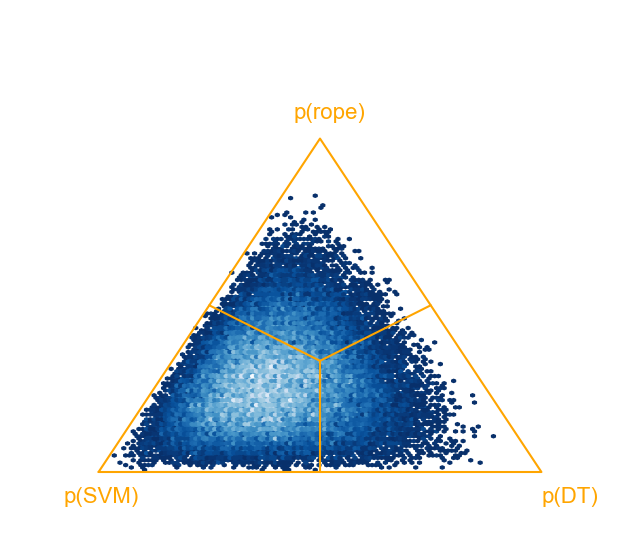

In [187]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=1, prior_place=bt.LEFT)
fig = bt.plot_posterior(samples,names)
plt.show()

... and on the right

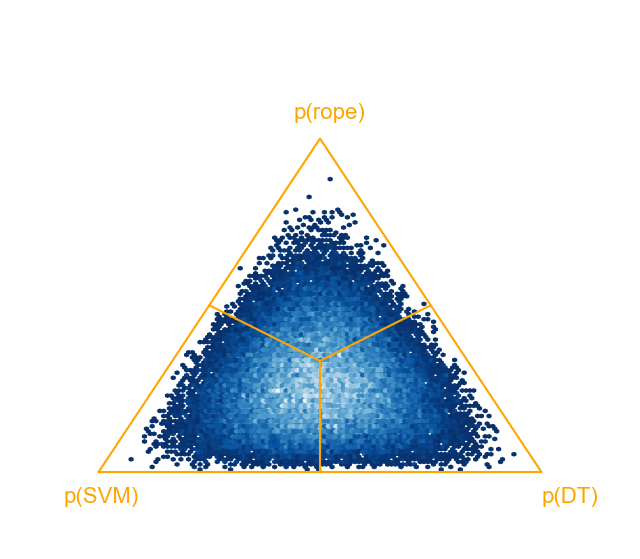

In [188]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=1, prior_place=bt.RIGHT)
fig = bt.plot_posterior(samples,names)
plt.show()

The prior with a strength of 1 has negligible effect. Only a much stronger prior on the left would shift the probabilities toward NBC:

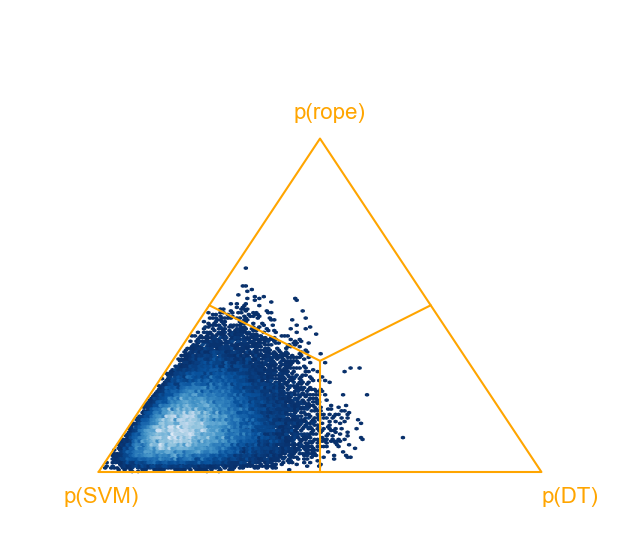

In [189]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=10, prior_place=bt.LEFT)
fig = bt.plot_posterior(samples,names)
plt.show()

### Auxiliary functions

The function signtest_MC(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000) computes the posterior for the given input parameters. The result is returned as a 2d-array with nsamples rows and three columns representing the probabilities 
. Call signtest_MC directly to obtain a sample of the posterior.

The posterior is plotted by plot_simplex(points, names=('C1', 'C2')), where points is a sample returned by signtest_MC.

### Bayesian hierarchical correlated t-test

In [190]:
import numpy as np
scores = np.loadtxt('acc_of_multiple_clf_ten_domains.csv', delimiter=',', skiprows=1)
names = ("SVM", "DT")
scores

array([[0.929825, 0.95614 , 0.95614 , 0.947368],
       [0.608696, 0.724638, 0.782609, 0.710145],
       [0.76    , 0.84    , 0.808   , 0.904   ],
       [0.2     , 0.2     , 0.2     , 0.2     ],
       [0.697674, 0.697674, 0.837209, 0.325581],
       [0.612903, 0.83871 , 0.709677, 0.709677],
       [0.985782, 0.976303, 0.987362, 0.974724],
       [0.875   , 0.692708, 0.942708, 0.880208],
       [0.753247, 0.746753, 0.733766, 0.766234],
       [0.94375 , 0.8125  , 0.95    , 0.8     ]])

To analyse this data, we will use the function hierarchical in the module bayesiantests that accepts the following arguments.

- scores: a 2-d array of differences.
- rope: the region of practical equivalence. We consider two classifiers equivalent if the difference  in their performance is smaller than rope.
- rho: correlation due to cross-validation
- names: the names of the two classifiers; if x is a vector of differences, positive values mean that the second (right) model had a higher score.

#### Summarizing probabilities

Function hierarchical(scores,rope,rho, verbose, names=names) computes the Bayesian hierarchical test and returns the probabilities that the difference (the score of the first classifier minus the score of the first) is negative, within rope or positive.

In [193]:
rope=0.01 #we consider two classifers equivalent when the difference of accuracy is less that 1%
rho=1/10

The following code uses a Bayesian version of signed-ranks (Benavoli et al, 2014) to compute the posterior distribution.

In [194]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define datasets
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},
}

# Define SVM and Decision Tree classifiers
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()

# Perform 10-fold, 10-run cross-validation on each classifier for each dataset
n_folds = 10
n_runs = 10
scores = []
for name, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    svm_scores = []
    dt_scores = []
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    for j in range(n_runs):
        svm_scores.append(cross_val_score(svm_clf, X, y, cv=kf).mean())
        dt_scores.append(cross_val_score(dt_clf, X, y, cv=kf).mean())
    scores.append({'Dataset': name, 'SVM_Avg_Score': sum(svm_scores) / len(svm_scores), 'DT_Avg_Score': sum(dt_scores) / len(dt_scores)})

# Put average scores in a pandas DataFrame
df = pd.DataFrame(scores)


In [195]:
df

,Dataset,SVM_Avg_Score,DT_Avg_Score
0,Breast Cancer,0.920865,0.923233
1,Liver,0.724538,0.636134
2,Balance Scale,0.902432,0.763605
3,Contact Lenses,0.000000,0.000000
4,Glass,0.331818,0.652381
5,Hepatitis,0.838750,0.787333
6,Hypothyroid,0.978502,0.985746
7,Tic tac toe,0.900833,0.876954
8,Diabetes,0.759091,0.701458
9,Anneal,0.761899,0.933445


In [196]:
svm = np.array(df['SVM_Avg_Score'])
svm 

array([0.92086466, 0.72453782, 0.90243216, 0.        , 0.33181818,
       0.83875   , 0.97850198, 0.90083333, 0.75909091, 0.76189873])

In [197]:
dt = np.array(df['DT_Avg_Score'])
dt

array([0.92323308, 0.63613445, 0.76360471, 0.        , 0.65238095,
       0.78733333, 0.98574612, 0.87695395, 0.70145762, 0.93344462])

In [198]:
import baycomp as bt
import matplotlib.pyplot as plt
from baycomp import two_on_multiple

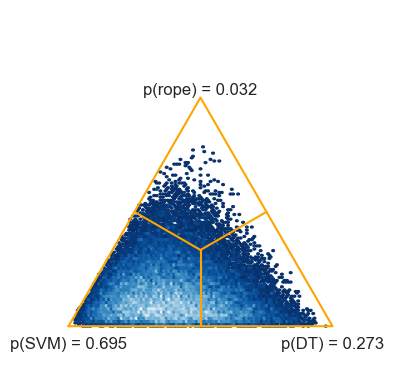

In [199]:
 probs, fig = two_on_multiple(svm, dt, rope=0.01, plot=True, names=names)